# Exercício 5.19

In [39]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Questão a)

Vamos considerar a seguinte função de transmissão:

$$
q(u) = \sin^2(\alpha u)
$$

Esta função atinge máximos para:

$$
\begin{align*}
\alpha u = \frac\pi2 + k\pi
\end{align*}
$$

Pelo que a distância entre fendas consecutivas é:
$$
\begin{align*}
\Delta u = \frac\pi\alpha
\end{align*}
$$

## Questão b)

Se a seperação é de $20\mu\text m$ então:

$$
\begin{align*}
\alpha = \frac\pi{\Delta u}
\end{align*}
$$

In [40]:
alpha = np.pi / (20e-6)
def q(u: np.ndarray) -> np.ndarray:
    global alpha
    return (np.sin(alpha * u))**2

## Questão c)

Se há dez fendas no total então $w = 200\mu\text{m}$. O integral que queremos calcular é:

$$
\begin{align*}
I(x) &= \left|\int_{-w/2}^{w/2}e^{2\pi i x u / \lambda f}\sqrt{q(u)}\ du\right|
\end{align*}
$$

A exponencial complexa tem um período na variável $u$ de $\lambda f / x$, e por isso uma frequência de $x / \lambda f$.

Logo, no mínimo deveremos usar $x / \lambda f$ pontos para avaliar o integral de forma a capturar a variação rápida da exponencial.

In [41]:
def simpsonA(start: float, end: float, func: Callable, eps = 1e-6, N1: int=2, maxN: int = 10_000) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando a regra de Simpson adaptativa começando com `N1` fatias e usando no máximo `maxN` fatias.
    """

    # Integral para N = N1
    h1 = (end - start) / N1

    S1 = (func(start) + func(end)) / 3
    T1 = 2 * func(start + h1) / 3
    I1 = h1 * (S1 + 2 * T1)

    # Usar o método adaptativo
    erro = eps + 1
    while abs(erro) > abs(eps):
        # Calcular o próximo integral
        N2 = N1 * 2
        h2 = h1 / 2

        S2 = S1 + T1
        T2 = 2 * np.sum(func(start + np.arange(1, N2 + 1, 2) * h2)) / 3     # O último elemento do arange é N2-1
        I2 = h2 * (S2 + 2 * T2)

        # Estimar o erro
        erro = (I2 - I1) / 15

        # O I2 atual é o próximo I1
        N1, h1, T1, S1, I1 = N2, h2, T2, S2, I2
        
        if N1 > maxN:
            raise ValueError(f"Não foi possível calcular o integral com a precisão desejada com menos de maxN = {maxN} fatias!")
    
    return I1

Text(0, 0.5, 'Intensidade')

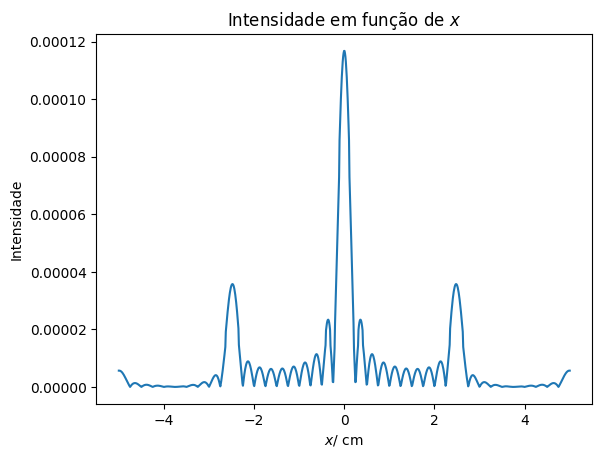

In [42]:
# Parâmetros
w = 200e-6
lamb = 500e-9
f = 1
xmax = 10e-2

P = 1000


# Calcular a intensidade
def intensidade(x: float, w: float, lamb: float, f: float) -> float:
    return abs(simpsonA(-w/2, w/2, lambda u: np.exp(2 * np.pi * 1j * x * u / (lamb * f)) * np.sqrt(q(u)), N1=abs(int(x/(lamb * f))), maxN=int(1e7)))


# Nota: Se fizermos o integral adaptativo normal, mesmo com eps=1e-6 o resultado é diferente do esperado!
# Experimenta para ver a acontecer!


# Representar graficamente
xx = np.linspace(-xmax/2, xmax/2, P)
ii = [intensidade(x, w, lamb, f) for x in xx]

plt.plot(xx*100, ii)
plt.title("Intensidade em função de $x$")
plt.xlabel("$x$/ cm")
plt.ylabel("Intensidade")

## Questão d)

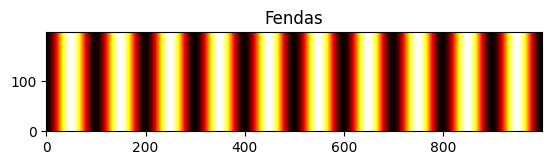

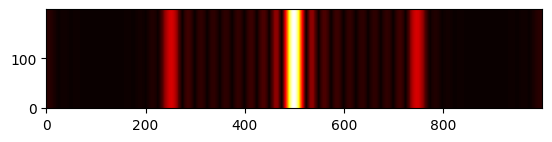

In [43]:
# Parâmetros
L = 200

# Obter os dados
ww = np.linspace(-w/2, w/2, P)
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = q(ww)


# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.title("Fendas")
plt.hot()
plt.show()


# Obter os dados
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = ii

# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.hot()
plt.show()

## Questão e)

### Questão i)

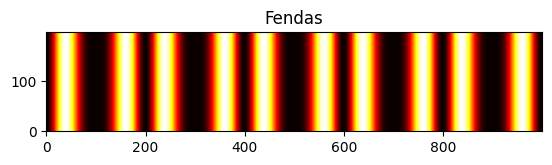

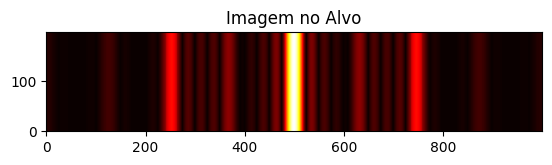

In [44]:
# Parâmetros
alpha = np.pi / (20e-6)
beta = alpha/2

w = 200e-6
lamb = 500e-9
f = 1
xmax = 10e-2

P = 1000
L = 200

def q(u: np.ndarray) -> np.ndarray:
    global alpha
    return (np.sin(alpha * u) * np.sin(beta * u))**2


# Representar graficamente
xx = np.linspace(-xmax/2, xmax/2, P)
ii = [intensidade(x, w, lamb, f) for x in xx]


# Ver as fendas

# Obter os dados
ww = np.linspace(-w/2, w/2, P)
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = q(ww)


# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.title("Fendas")
plt.hot()
plt.show()


# Obter os dados
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = ii

# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.title("Imagem no Alvo")
plt.hot()
plt.show()

### Questão ii)

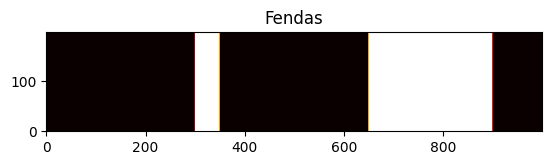

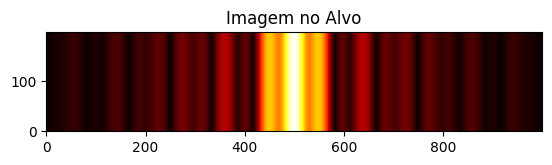

In [49]:
# Parâmetros
alpha = np.pi / (20e-6)
beta = alpha/2

w = 200e-6
lamb = 500e-9
f = 1
xmax = 10e-2

P = 1000
L = 200

def q(u: np.ndarray) -> np.ndarray:
    global alpha

    # Vamos colocar uma fenda em [-40, -30] e outra em [30, 50] 
    fenda1 = np.where(-40e-6 <= u, np.ones_like(u), np.zeros_like(u)) + np.where(-30e-6 <= u, -np.ones_like(u), np.zeros_like(u))
    fenda2 = np.where(30e-6 <= u, np.ones_like(u), np.zeros_like(u)) + np.where(50e-6 <= u, -np.ones_like(u), np.zeros_like(u))
    return fenda1 + fenda2


# Representar graficamente
xx = np.linspace(-xmax/2, xmax/2, P)
ii = [intensidade(x, w, lamb, f) for x in xx]


# Ver as fendas

# Obter os dados
ww = np.linspace(-w/2, w/2, P)
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = q(ww)

# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.title("Fendas")
plt.hot()
plt.show()


# Obter os dados
dados = np.zeros((L, P))
for i in range(L):
    dados[i] = ii

# Mostrar a imagem
plt.imshow(dados, origin="lower")
plt.title("Imagem no Alvo")
plt.hot()
plt.show()